# Is the Shape of fMRI Hemodynamic Responses Relevant for Studying Neural Function
## Abstract
Variations in the shape of the hemodynamic function is typically considered strictly dependant on vascular-related factors and irrelevant to the study of neural function--neural activity in a given piece of brain tissue triggers a stereotypical reponse time course. Recent work however suggest the temporal shape of a response varies according to stimulus or task conditions, suggesting different shapes may be diagnostic of different underlying neural processes.

[working model with inhibition]

[confirms prediction of the model only for overlaid stimuli] Here show that one temporal shape parameter, the delay of the fMRI BOLD response, is increased when competing visual stimuli are overlayed, but not unaffeted when stimuli are presented alone.

We interpret our results as evidence that the hemodynamic delay may reflect the balance between excitation and inhibition involve in local neural processes.

With further experimental validation, this could bring fMRI methods beyond the mapping of brain functions and closer to more clinically-relevant descriptions neural processes within a given brain tissue.
## Context
## Working Model and Hypothesis

## Experimental Approach and Data Acquisition
### Stimuli
### Functional MRI Paradigm
In each run, stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

Please get the data from the repo if not done already
data repo: C:/Users/sebas/OneDrive - McGill University/dataBig
IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: preprocessed functionals (C-derived\DecodingHR\fun\x)
IN: stimulus timing (B-clean\DecodingHR\stim\160118_cyclicStim\data)
F(IN)=OUT: 2-df sinusoidal fit to single voxel time series
OUT: fit params and stats + HRF estimates (C-derived\DecodingHR\fun\y)
Not actually running because way too long



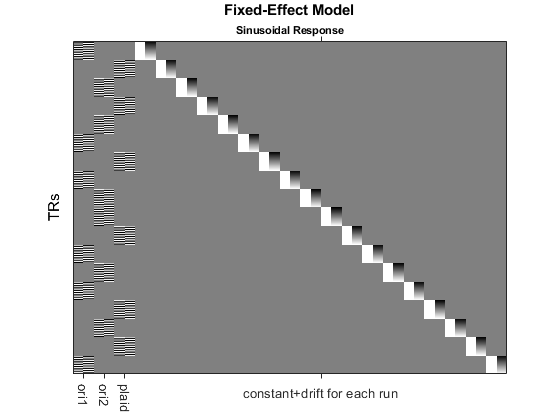

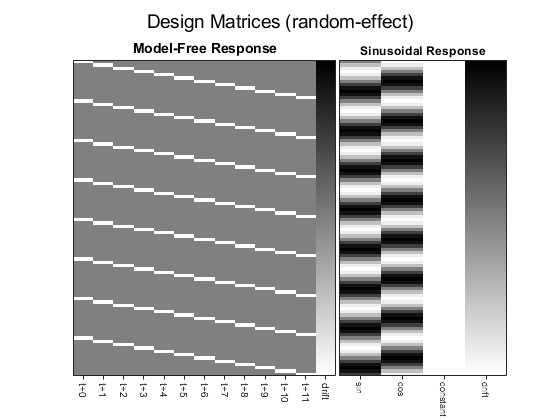

In [3]:
clear all
addpath(genpath(fullfile(pwd,'matlabFun')));
runFit

IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: voxel visual field eccentricity (C-derived\DecodingHR\anat\z)
IN: sinusoidal fit results (C-derived\DecodingHR\fun\y)
F(IN)=OUT: masks the fit according to voxel eccentricity and activation level
Figures are additionally thresholded for activation level, but not the data that is saved!
OUT: sinusoidal fit results (C-derived\DecodingHR\fun\z)
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\02jp_maskSinAndHrFit_noMovement
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\03sk_maskSinAndHrFit_noMovement
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\04sp_maskSinAndHrFit_noMovement
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\05bm_maskSinAndHrFit_noMovement
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\06sb_maskSinAndHrFit_n

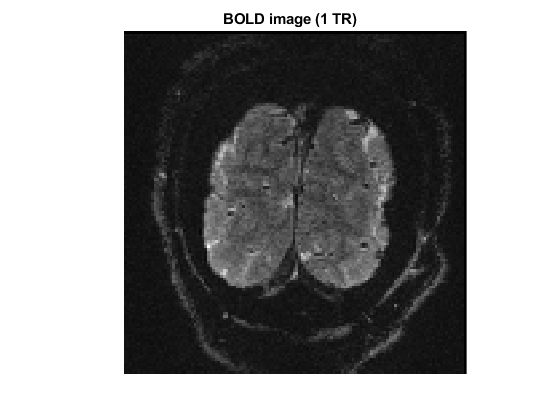

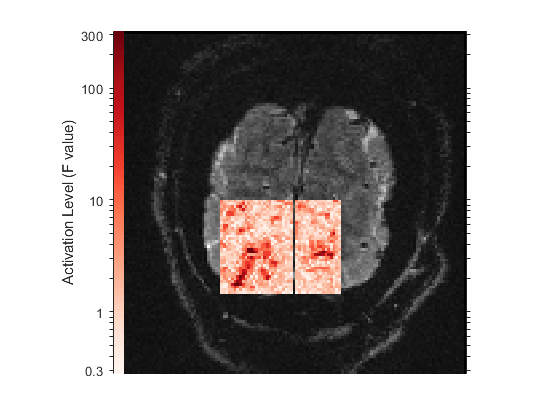

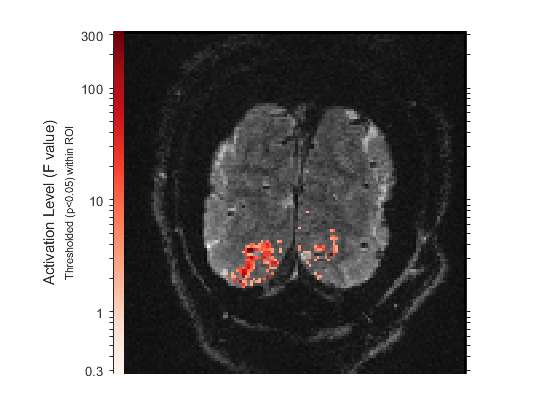

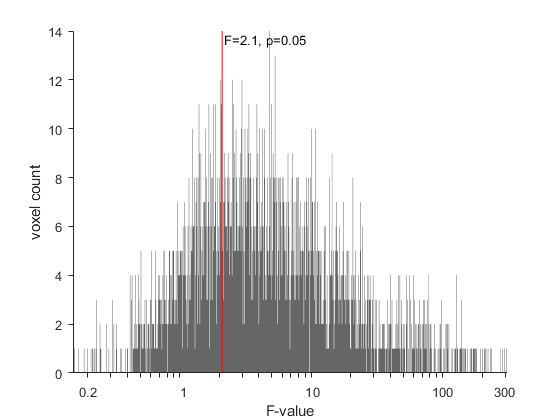

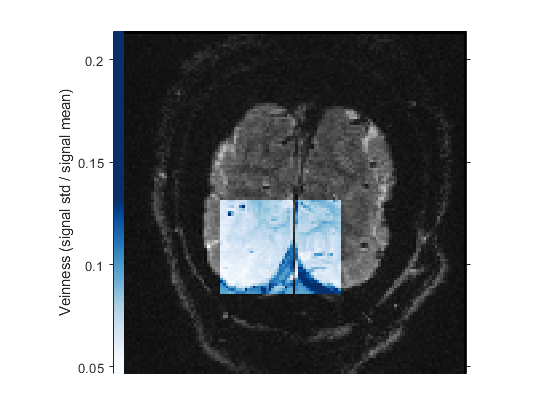

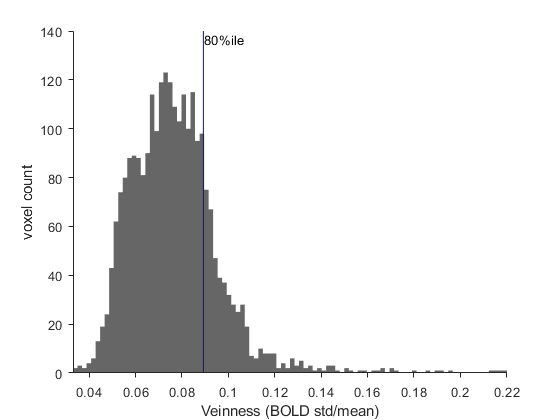

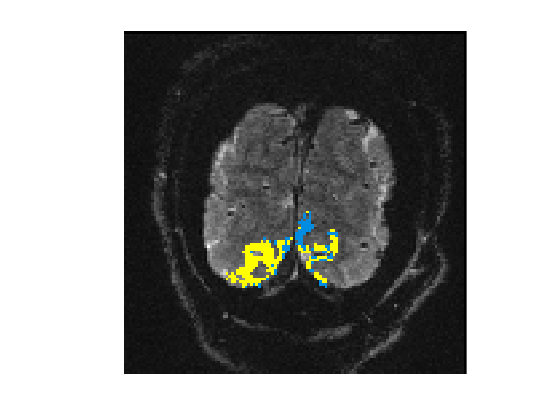

In [4]:
fitType = 'fixed';
threshType = 'p';
veinPerc = 20;
defineAndShowMasks(fitType,threshType,veinPerc)

## Prediction 1: Competing stimuli evoke a more delayed HR, compared to stimuli presented alone.

### Compare responses evoked by different stimuli

In [ ]:
applyFeatSelAndClean

IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived\DecodingHR\z)
threshVal=0.05
F(IN)=OUT: threshold included voxels and analyse responses averaged across the ROI
OUT: figures and stats
+++
masking out veins vox
masking out inactive vox
Leaving 1457 and 1541 vox in sess1 and sess2
+++
+++
masking out veins vox
masking out inactive vox
Leaving 1853 and 1451 vox in sess1 and sess2
+++
+++
masking out veins vox
masking out inactive vox
Leaving 1511 and 1363 vox in sess1 and sess2
+++
+++
masking out veins vox
masking out inactive vox
Leaving 1705 and 1705 vox in sess1 and sess2
+++
+++
masking out veins vox
masking out inactive vox
Leaving 1646 and 1491 vox in sess1 and sess2
+++
+++
masking out veins vox
masking out inactive vox
Leaving 912 and 822 vox in sess1 and sess2
+++
***
delay (plaid-ori) = 0.141s
delay (ori2-ori1) = 0.066s
amp (plaid-ori) = -0.035%BOLD
amp (ori2-ori1) = -0.014%BOLD
***
---------------
Cartesian Space
---------------
Ori vs Plaid:
Hotelling's T^2 mul

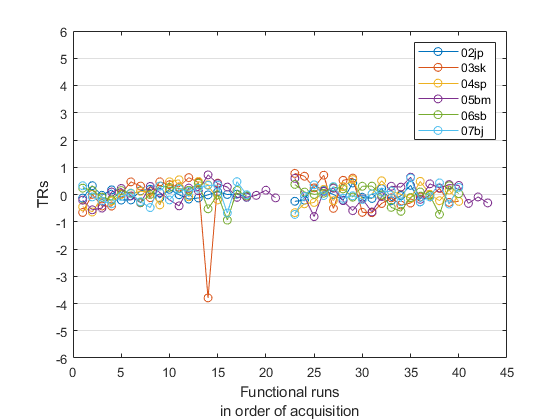

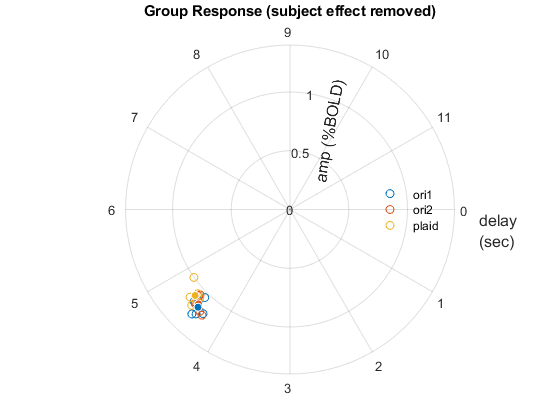

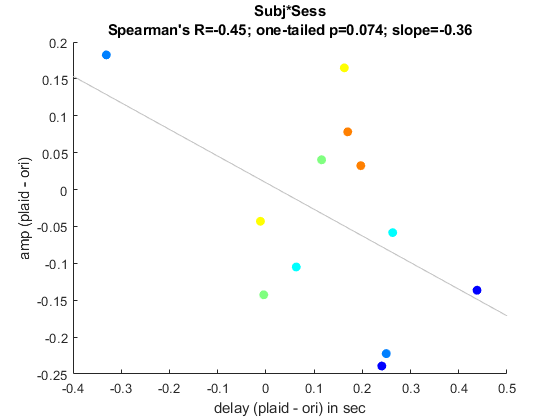

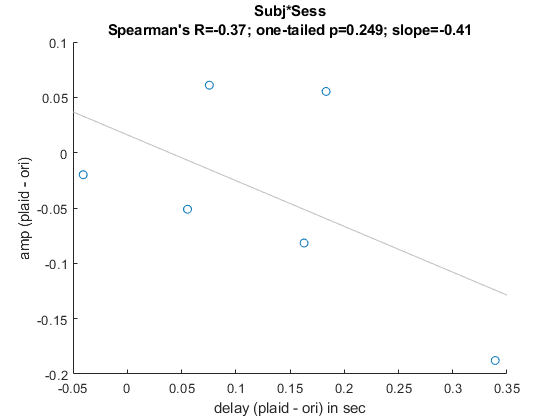

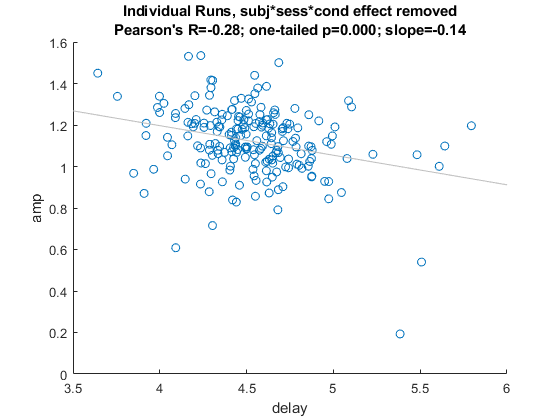

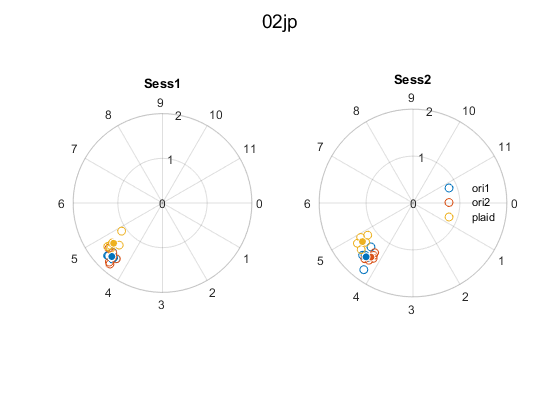

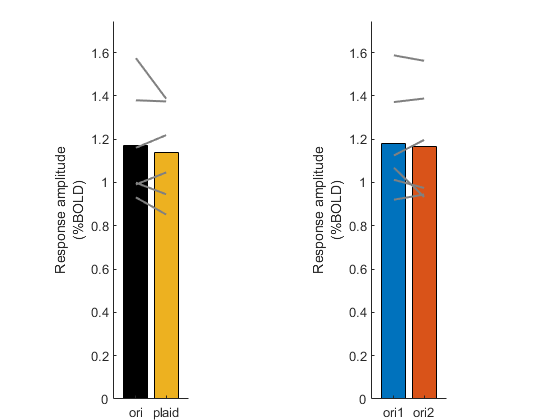

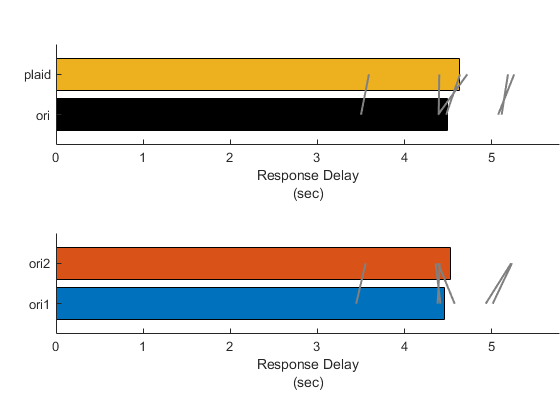

In [5]:
runGroupAnalysis_sin

### Visualize the sinusoidal response in V1

In [ ]:
hrGroupAnalysis

### Conclusion on Prediction 1
The inhibition involve by the overlayed presentation of orhtogonal grating increases the hemodynamic delay with little effect on the amplitude of the hemodynamic response. The excitation/inhibition balance is altered, not the overlay level of synaptic acticity.

## Prediction 2: Stimulus orientation can be predicted not only from the multivoxel pattern of BOLD responses, but also from the pattern of BOLD delays

In [ ]:
clear res

In [ ]:
svmSpace = 'polMag';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

In [ ]:
svmSpace = 'polDelay';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

In [ ]:
svmSpace = 'cartReal';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

In [ ]:
plotDecoding(res)

### Conclusion on Prediction 2
Sensitivity of the paradigm confirmed.
But stimulus presented alone do not significantly affect the delay.
Neural inhibition activity related to cross-orientation suppression may only be sufficiently strong under situations where there is sufficient feed-forward drive to the inhibited neural population.

## Conclusion
Overlayed orthogonal gratings induced mutual ihibitory activity between two neural populations (alter the excitation/inhibition balance) that contribute the the fMRI response in a way that delays to measured response.

Gratings presented alone induce balanced levels of excitation and inhibition, leading to indiscriminable hemodynamic delays.